In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat 
import os
import glob
import seaborn as sns
import matplotlib as mpl
import pandas as pd
from tqdm.notebook import tqdm
from scipy import interpolate, stats

In [2]:
plt.rcParams["font.family"] = "Arial" 
#plt.rcParams['axes.spines.right'] = False
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.axisbelow'] = True
plt.rcParams["svg.fonttype"] = "none"

In [3]:
genres_label = ['drama', 'animation', 'nature']
genres = ['‘drama/other’', '‘cartoon/animation’', '‘doc/nature’']

In [4]:
embed_dim = 32
mds_dist_data = [np.load(f"../results/mds_dist_N2010_dim{embed_dim}.npz", allow_pickle=True)]
for gen in genres_label:
    mds_dist_data.append(np.load(f"../results/mds_dist_CW2019_{gen}_dim{embed_dim}.npz", allow_pickle=True))

In [5]:
mds_dist_dicts = [data["mds_dist"].item() for data in mds_dist_data]

In [6]:
training_methods = ["dino", "supervised"] 
depth_list = [4, 8, 12]
num_models = 6

In [7]:
#cmaps = [mpl.colormaps.get_cmap('Blues'), mpl.colormaps.get_cmap('Greens')]
cmap = mpl.colormaps.get_cmap('viridis')

In [8]:
corr_mat = np.zeros((2, 3, 3))
for i, tm in enumerate(training_methods):
    for j, depth in enumerate(depth_list):
        for g in range(3):
            #res = stats.spearmanr(mds_dist_dicts[0][tm][str(depth)].flatten(), 
            #                      mds_dist_dicts[g+1][tm][str(depth)].flatten())
            res = stats.pearsonr(mds_dist_dicts[0][tm][str(depth)].flatten(), 
                                 mds_dist_dicts[g+1][tm][str(depth)].flatten())
            corr_mat[i, j, g] = res[0]

In [9]:
corr_mat_rs = corr_mat.reshape(-1, 3)

In [10]:
model_label = np.array([[f"DINO ViT-{d}" for d in depth_list], [f"SL ViT-{d}" for d in depth_list]]).flatten()

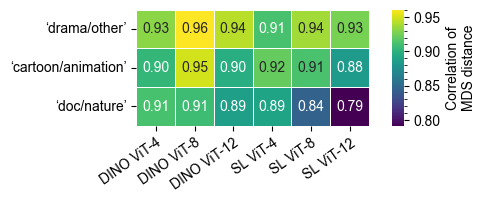

In [11]:
fig, ax = plt.subplots(figsize=(3, 2))
cax = ax.inset_axes([1.1, 0, 0.05, 1])
g = sns.heatmap(corr_mat_rs.T,cmap="viridis",  linewidths=0.5, annot=True, fmt='.2f', square=True, ax=ax,
                xticklabels=model_label, yticklabels=genres, cbar_ax=cax, cbar_kws={"orientation": "vertical"})
g.set_xticklabels(g.get_xticklabels(), rotation=35, ha="right", rotation_mode='anchor')
#g.set_yticklabels(g.get_yticklabels(), rotation=35, ha="right", rotation_mode='anchor')
g.collections[0].colorbar.ax.minorticks_on()
g.collections[0].colorbar.set_label(label="Correlation of\nMDS distance",size=10)
plt.savefig(f"../figures/corr_mds_dist.svg", dpi=300, bbox_inches="tight")